In [10]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')
import pandas as pd
from rdkit.Chem import AllChem


In [2]:
from psikit import Psikit

In [3]:
pk=Psikit()


  Memory set to   3.725 GiB by Python driver.
  Threads set to 4 by Python driver.


In [4]:
pk.read_from_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

In [5]:
pk.optimize()

Optimizer: Optimization complete!


-676.3571175908894

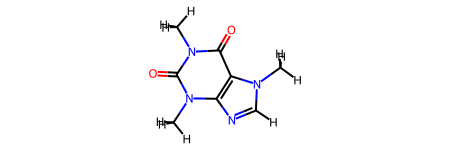

In [6]:
pk.mol

In [7]:
m = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

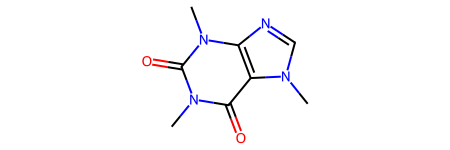

In [11]:
AllChem.ComputeGasteigerCharges(m)
m

In [12]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.2012612   0.07053639  0.08505954 -0.47140658  0.12577601 -0.10083417
  0.36409508 -0.49600935 -0.04595403  0.3625243  -0.5285875   0.02500884
  0.00605449 -0.03375552  0.11036584  0.11036584  0.11036584  0.17305142
  0.05004294  0.05004294  0.05004294  0.06149198  0.06149198  0.06149198]
[-0.11403953 -0.69387161  0.38640956 -0.62283942  0.634974    0.093259
  0.89978883 -0.63014384 -0.87904355  1.09566897 -0.62724373 -0.87749721
 -0.12040853 -0.12349387  0.12973196  0.16727755  0.16726887  0.18241272
  0.16750553  0.14895394  0.14892481  0.14560139  0.14560929  0.17519489]
[-0.13210079 -0.052337    0.07734821 -0.2754393   0.139612   -0.12549876
  0.29394263 -0.39450049 -0.18830327  0.34848005 -0.39857879 -0.1525097
 -0.13202199 -0.13825373  0.10404907  0.1167594   0.11778367  0.1213383
  0.11931931  0.10841299  0.1077044   0.10710546  0.10597673  0.12171161]


In [13]:
mol = pk.mol
atoms = mol.GetAtoms()

In [14]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [15]:
df = pd.DataFrame(data)

In [16]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.201,-0.114,-0.132
1,N,0.071,-0.694,-0.052
2,C,0.085,0.386,0.077
3,N,-0.471,-0.623,-0.275
4,C,0.126,0.635,0.140
5,C,-0.101,0.093,-0.125
6,C,0.364,0.900,0.294
7,O,-0.496,-0.630,-0.395
8,N,-0.046,-0.879,-0.188
9,C,0.363,1.096,0.348


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
plt.style.use('ggplot')

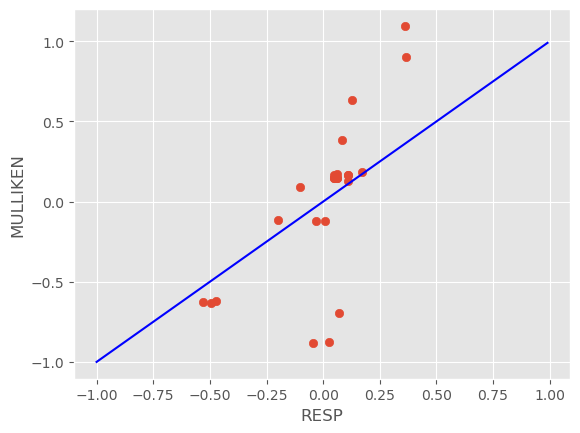

In [19]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

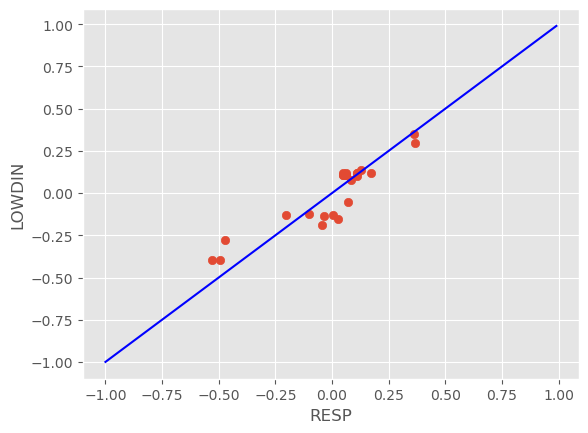

In [20]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

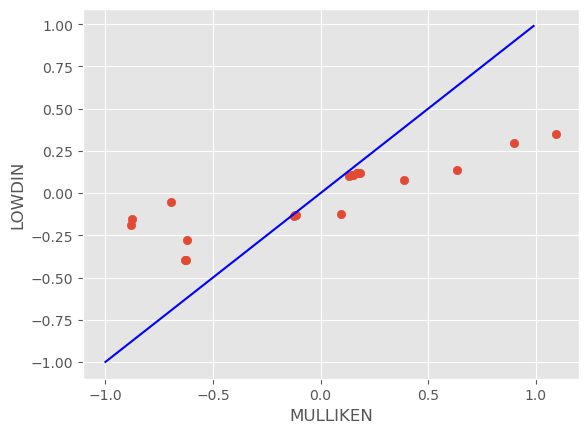

In [21]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')